In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

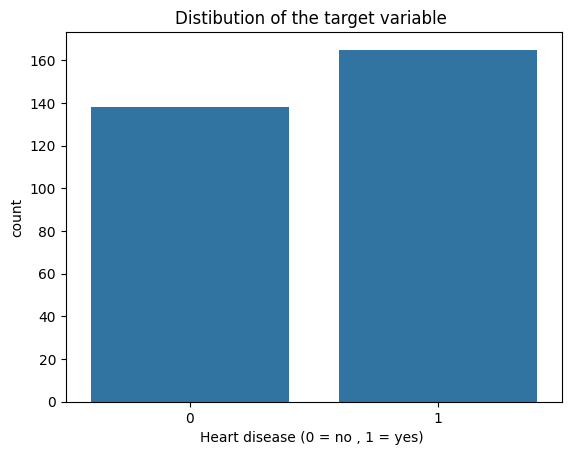

In [10]:
# countplot for distribution of the 

sns.countplot(x='target' , data=df)
plt.title('Distibution of the target variable ')
plt.xlabel('Heart disease (0 = no , 1 = yes) ')
plt.ylabel('count')
plt.show()


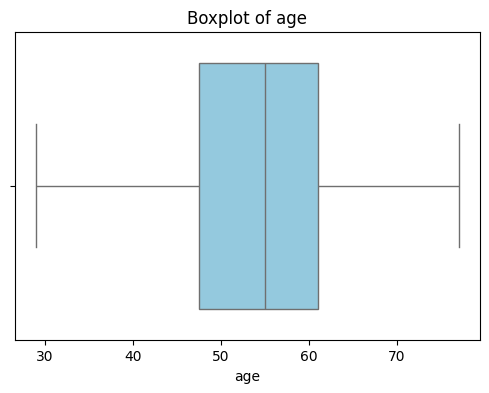

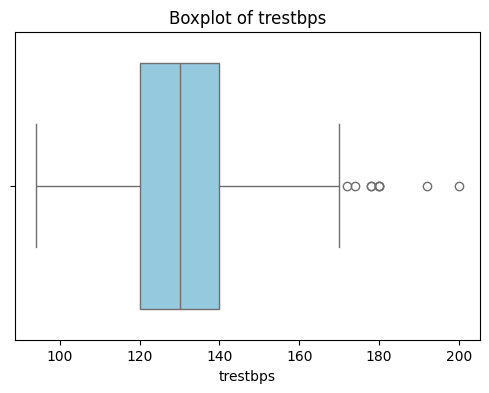

In [11]:
# boxplot 
columns = ['age' , 'trestbps']
for col in columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col] , color = 'skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

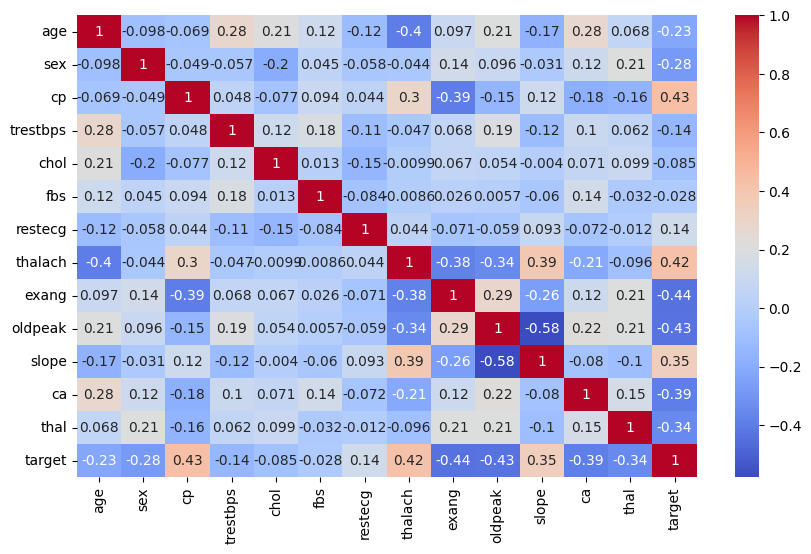

In [13]:
# heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr() , annot=True , cmap='coolwarm')
plt.show()

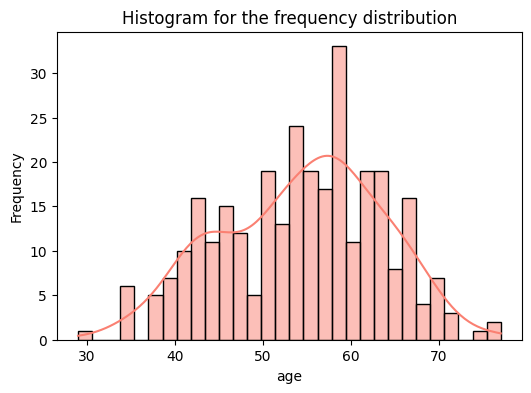

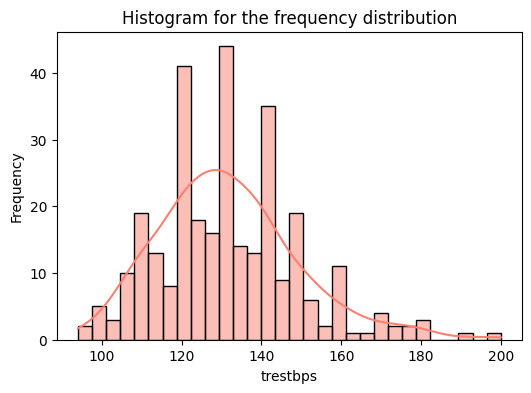

In [15]:
# histplot
for col in columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col] , kde = True , bins = 30 , color = 'Salmon')
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.title('Histogram for the frequency distribution')
    plt.show()

In [16]:
x = df.drop('target' , axis = 1)
y = df['target']

In [17]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [19]:
sc = StandardScaler()

In [20]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [21]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [22]:
x_train_scaled

array([[-1.35679832,  0.72250438,  0.00809909, ...,  0.95390513,
        -0.68970073, -0.50904773],
       [ 0.38508599,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [-0.92132724,  0.72250438,  0.98808912, ..., -0.69498803,
        -0.68970073, -0.50904773],
       ...,
       [ 1.58263146,  0.72250438,  1.96807914, ..., -0.69498803,
         0.32186034, -0.50904773],
       [-0.92132724,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [ 0.92942484, -1.38407465,  0.00809909, ...,  0.95390513,
         1.33342142, -0.50904773]])

In [23]:
x_test_scaled

array([[ 2.76218225e-01,  7.22504380e-01, -9.71890936e-01,
         1.16949120e+00,  5.53408401e-01, -3.83300706e-01,
        -1.04610909e+00, -1.70875171e+00,  1.47790748e+00,
        -3.75556294e-01, -6.94988026e-01,  3.21860343e-01,
        -2.19657581e+00],
       [ 4.93953764e-01,  7.22504380e-01,  1.96807914e+00,
         2.36038903e+00,  7.81171723e-01, -3.83300706e-01,
        -1.04610909e+00,  3.98288831e-01, -6.76632341e-01,
        -7.39094787e-01, -6.94988026e-01, -6.89700735e-01,
         1.17848036e+00],
       [ 2.76218225e-01,  7.22504380e-01,  9.88089118e-01,
         1.16949120e+00, -2.29363312e+00,  2.60891771e+00,
         8.43132697e-01,  1.02591793e+00, -6.76632341e-01,
        -7.39094787e-01,  9.53905134e-01,  3.21860343e-01,
         1.17848036e+00],
       [ 1.67350456e-01, -1.38407465e+00, -9.71890936e-01,
         2.16772932e-01,  3.07778522e+00, -3.83300706e-01,
        -1.04610909e+00, -5.18701733e-03,  1.47790748e+00,
         8.05943807e-01, -6.94988026e

In [25]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = model.predict(x_test_scaled)

In [27]:
# evaluation

In [28]:
print("classification report" , classification_report(y_test,y_pred))

classification report               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [30]:
from sklearn.metrics import confusion_matrix

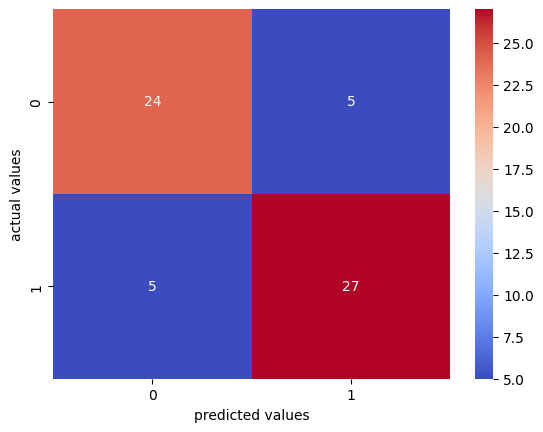

In [31]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot=True , cmap='coolwarm')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()

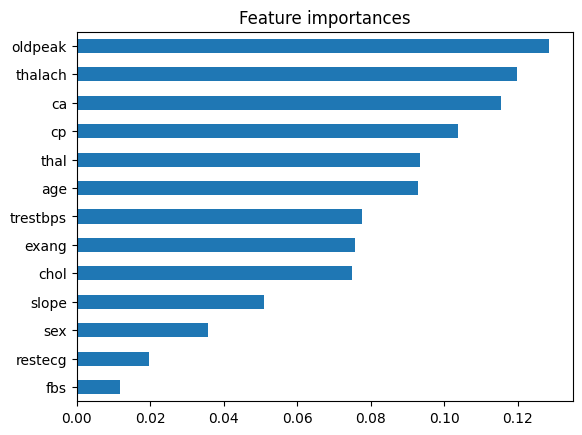

In [33]:
imps = pd.Series(model.feature_importances_, index = x.columns)
imps.sort_values().plot(kind ='barh' , title = 'Feature importances')
plt.show()